<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P7E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

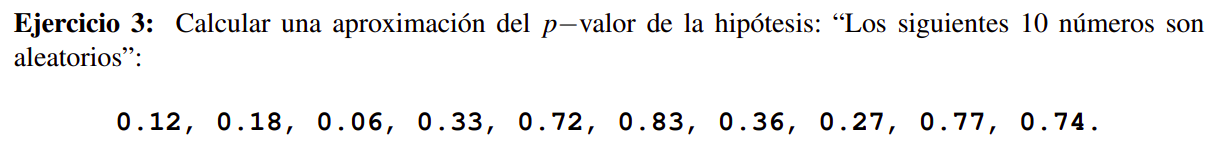

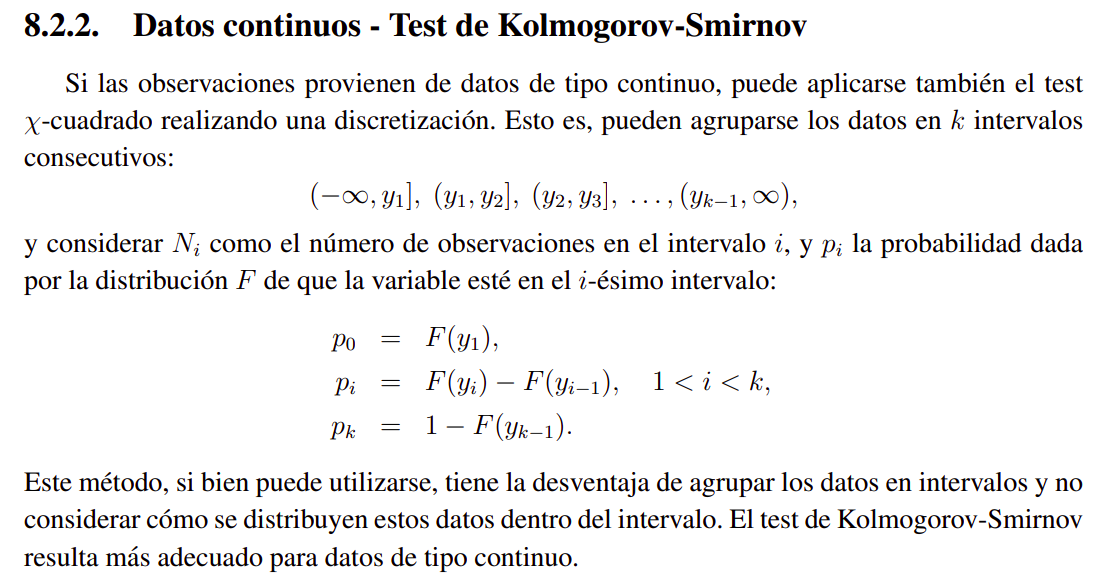

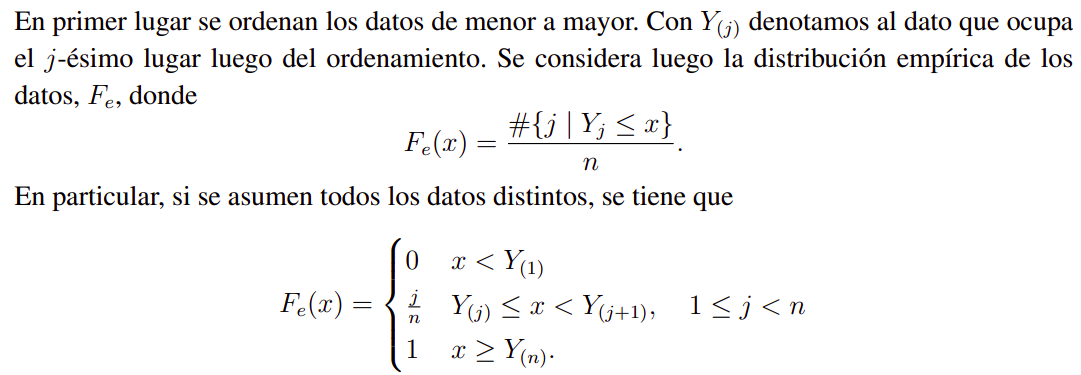

In [50]:
from scipy.stats import chi2
from random import random, seed
import numpy as np

MUESTRA_EMPIRICA = [0.12, 0.18, 0.06, 0.33, 0.72, 0.83, 0.36, 0.27, 0.77, 0.74]
n_TAMANO_MUESTRA = len(MUESTRA_EMPIRICA)

Ys_EMPIRICA = sorted(MUESTRA_EMPIRICA)

def Fe_empirica(x): # 0 <= x <= 1
    j = np.searchsorted(Ys_EMPIRICA, x)
    return j / n_TAMANO_MUESTRA
    # if x < Ys_EMPIRICA[0]: return 0
    # for j, v in enumerate(Ys_EMPIRICA, start=1):
    #     if v <= x:
    #         return j / n_TAMANO_MUESTRA

def F_H0(x): # 0 <= x <= 1
    return x # F = U(0,1)

def muestreador_F():
    return random()

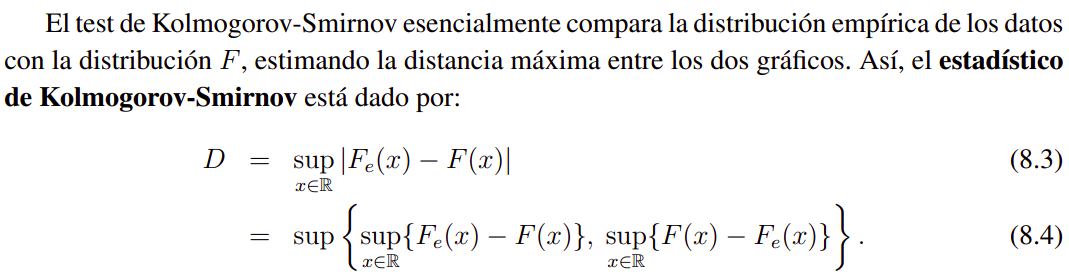

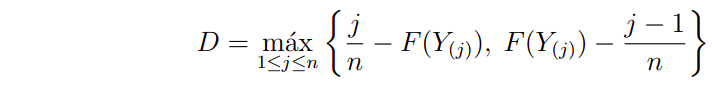

In [51]:
def calcular_estadistico_Kolmogorov_Smirnov_conF(Ys):
    Ys.sort()
    D = 1 / n_TAMANO_MUESTRA - F_H0(Ys[0])
    for j, y in enumerate(Ys, start=1):
        D = max(D, j / n_TAMANO_MUESTRA - F_H0(y))
        D = max(D, F_H0(y) - (j - 1) / n_TAMANO_MUESTRA)
    return D

d_KS_empirico = calcular_estadistico_Kolmogorov_Smirnov_conF(Ys_EMPIRICA)
print(d_KS_empirico)

0.24


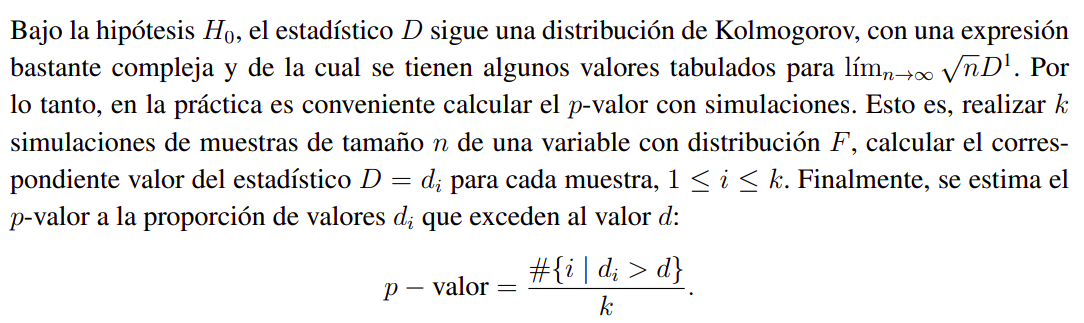

In [52]:
def estimar_Pvalor_KS_conF(n_sim):
    d_KS_mayores_al_empirico = 0
    for _ in range(n_sim):
        Ys_Fmuestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRA)]
        d_KS = calcular_estadistico_Kolmogorov_Smirnov_conF(Ys_Fmuestra)
        if d_KS > d_KS_empirico:
            d_KS_mayores_al_empirico += 1
    return d_KS_mayores_al_empirico / n_sim

N_SIM = 100_000
seed(1)
p_valor_estimado = estimar_Pvalor_KS_conF(N_SIM)
print(f"P-valor estimado: {p_valor_estimado}")

P-valor estimado: 0.53781


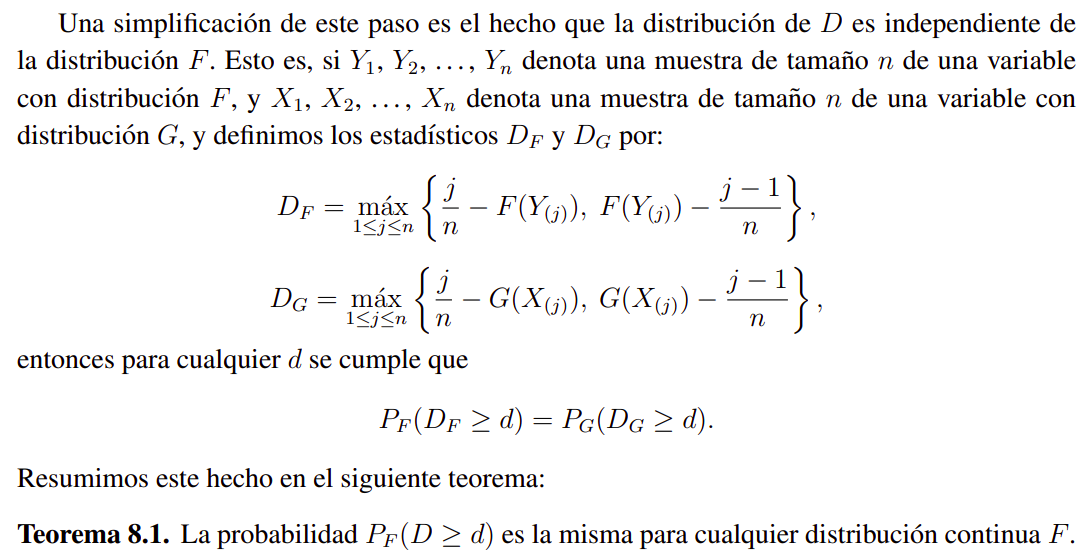

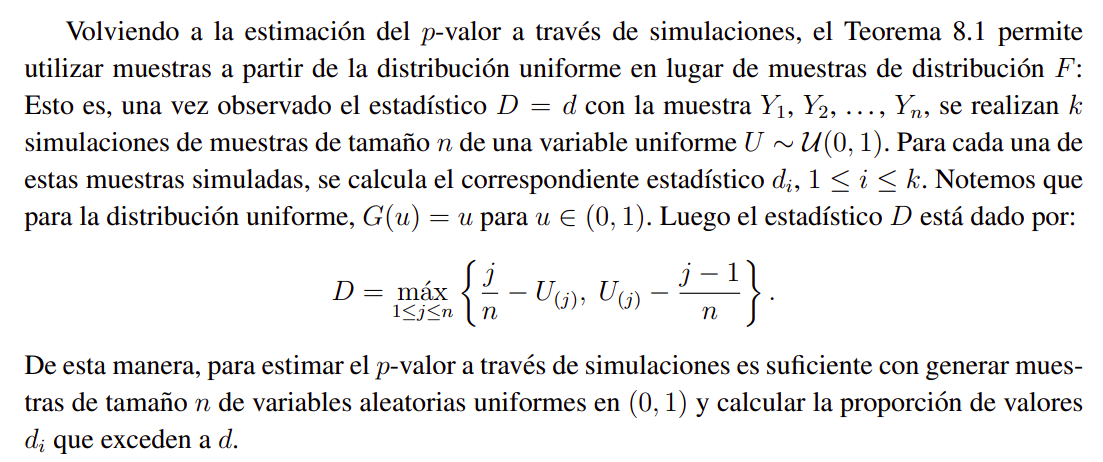

In [55]:
def calcular_estadistico_Kolmogorov_Smirnov_conU(Ys):
    Ys.sort()
    D = 1 / n_TAMANO_MUESTRA - Ys[0]
    for j, y in enumerate(Ys, start=1):
        D = max(D, j / n_TAMANO_MUESTRA - y)
        D = max(D, y - (j - 1) / n_TAMANO_MUESTRA)
    return D

d_KS_empirico = calcular_estadistico_Kolmogorov_Smirnov_conU(Ys_EMPIRICA)
print(d_KS_empirico)

0.24


In [57]:
def estimar_Pvalor_KS_conU(n_sim):
    d_KS_mayores_al_empirico = 0
    for _ in range(n_sim):
        Ys_Fmuestra = [random() for _ in range(n_TAMANO_MUESTRA)]
        d_KS = calcular_estadistico_Kolmogorov_Smirnov_conU(Ys_Fmuestra)
        if d_KS > d_KS_empirico:
            d_KS_mayores_al_empirico += 1
    return d_KS_mayores_al_empirico / n_sim

N_SIM = 100_000
seed(1)
p_valor_estimado = estimar_Pvalor_KS_conU(N_SIM)
print(f"P-valor estimado: {p_valor_estimado}")

P-valor estimado: 0.53781


# Conclusion
para un $\alpha \leq \text{p-valor} = 0.53781$ no hay suficiente evidencia para rechazar H0. Es decir que el resultado observado no es lo suficientemente extremo como para considerarlo inconsistente con la hipótesis nula.